# Programming for Data Analytics - Project

# Project - Creating a Data Set which simulates a real-world phenomenon

## Introduction

This project is modelled on the business activites of the Office of Government Procurement's Education department.

The following is a simulation of a data set recording the capital projects of five Irish universities in 2017:
 - University College Dublin (UCD)
 - Dublin City University (DCU)
 - University of Limerick (UL)
 - Trinity College Dublin (TCD)
 - National University of Ireland Galway (NUIG)

These projects are for five categories:
 - Laboratory
 - Agriculture
 - Veterinary
 - Library
 - Education Specific
 
These capital projects have a minimum value of €25,000 and a maximum value of €1,000,000.  The projects are allocated to one of five individuals.  The duration of the projects is between 21 and 60 days.  Project start dates are all in 2017.

The project analyses a randomly generated data set which is based on the above information. The aim of the analysis is to investigate the category which is the most beneficial to the organisation based on:
 - university demand, 
 - the capital spend, 
 - the time spent by employees completing the projects.  
 
It is also hoped that an analysis of the start dates of the projects will allow the organisation to allocate staff accordingly, ie to ensure adequate staff are available at times of high demand.


### Creating the Random Data Set

Import the Pandas, Numpy, Matplotlib and Datetime libraries

In [9]:
import pandas as pd

In [10]:
import numpy as np

In [11]:
import matplotlib.pyplot as plt

In [12]:
import datetime

Enable matplotlib graphs to be displayed

In [13]:
%matplotlib inline

Create a random seed to fix the randomly generated data to specifc values each time it is run

In [14]:
np.random.seed(0)

Set up the lists of University Names, Category Names and Employee Names to be used

In [17]:
uni_name = ['UL', 'TCD', 'DCU', 'UCD', 'NUIG']

In [18]:
cat_name = ['Vet', 'Agric', 'Lab', 'Library', 'Specific']

In [19]:
ee_name = ['Ann', 'Mary', 'Tom', 'John', 'Mark']

Create 26 random dates as the start dates for each randomly generated project

In [20]:
def random_dates(start, end, n=26):

    start_u = start.value//10**9
    end_u = end.value//10**9

    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

start = pd.to_datetime('2017-01-01')
end = pd.to_datetime('2018-01-01')


Create the random data set which randomly chooses 26 projects broken down into a University, Category, random spend value between €25,000 and €1,000,000, random start date with the year 2017, a random duration for completion of the project between 21 and 60 days and a randomly assigned specialist to complete each project.

In [21]:
raw_data = {'University': np.random.choice(uni_name, 26), 
        'Category': np.random.choice(cat_name, 26), 
        'Spend': np.random.randint(25000, 1000000, 26),
        'Start': random_dates(start, end),
            'Duration': np.random.randint(21,60, 26),
        'Specialist': np.random.choice(ee_name, 26)}
df = pd.DataFrame(raw_data, columns = ['University', 'Category', 'Spend', 'Start', 'Duration', 'Specialist'])


In [ ]:
Create a random seed to fix the randomly generated data to specifc values each time it is run

In [54]:
np.random.seed(0)

Save the randomly created data set as a csv file so the data frame can be analysed

In [55]:
df.to_csv('unispend.csv')

Read the csv file back to this jupyter notebook

In [56]:
data = pd.read_csv("unispend.csv")

Delete the extra column which was added to the date set when the csv file was read back into the notebook

In [57]:
data.drop('Unnamed: 0',axis=1, inplace=True)

## University Capital Projects 2017 - Random Data Set

In [61]:
data

,University,Category,Spend,Start,Duration,Specialist
0,NUIG,Vet,595810,2017-06-04 16:50:20,57,John
1,UL,Agric,138183,2017-08-21 04:30:28,55,Ann
2,UCD,Library,111904,2017-07-05 04:29:40,50,John
3,UCD,Library,45737,2017-06-13 15:02:00,24,Tom
4,UCD,Library,546537,2017-01-16 05:10:38,55,John
5,TCD,Vet,709007,2017-09-25 02:33:51,34,Ann
6,UCD,Agric,741713,2017-10-23 15:39:00,42,Ann
7,DCU,Agric,379361,2017-04-22 06:08:35,30,Ann
8,NUIG,Agric,105163,2017-11-11 07:09:46,21,John
9,UL,Vet,299278,2017-05-16 04:35:35,31,Tom


The data set comprises of 26 lines and 6 columns

In [51]:
data.shape

(26, 6)

## Project Spend & the Project Length

 - There were 26 projects in 2017.
 <br>
 - The **lowest project spend** in 2017 was €45,737.
 - The **highest project spend** in 2017 was €922,798.
 - The **average project spemd** €498,211.
 <br>
 - The **shortest project length** was 21 days.
 - The **longest project length** was 57 days.
 - The **average project length** was 41 days to completion.

In [53]:
data.describe()

,Spend,Duration
count,26.000000,26.000000
mean,498211.192308,40.846154
std,286122.310686,12.450517
min,45737.000000,21.000000
25%,251768.500000,31.000000
50%,554098.500000,41.500000
75%,739327.500000,54.000000
max,922798.000000,57.000000


## University Project Breakdown

### The 26 projects were divided as below, with UCD and UL having the majority of projects at 7 each.  The lowest amount of projects were submitted by DCU at 3 projects in total.

In [65]:
customer_group = customers.groupby('University')
customer_group.size()

University
DCU     3
NUIG    4
TCD     5
UCD     7
UL      7
dtype: int64

### The total capital spend for the 26 projects was €12,953,491.

In [95]:
data.loc['Total'] = pd.Series(df['Spend'].sum(), index = ['Spend'])
data

,University,Category,Spend,Start,Duration,Specialist
0,NUIG,Vet,595810.0,2017-06-04 16:50:20,57.0,John
1,UL,Agric,138183.0,2017-08-21 04:30:28,55.0,Ann
2,UCD,Library,111904.0,2017-07-05 04:29:40,50.0,John
3,UCD,Library,45737.0,2017-06-13 15:02:00,24.0,Tom
4,UCD,Library,546537.0,2017-01-16 05:10:38,55.0,John
5,TCD,Vet,709007.0,2017-09-25 02:33:51,34.0,Ann
6,UCD,Agric,741713.0,2017-10-23 15:39:00,42.0,Ann
7,DCU,Agric,379361.0,2017-04-22 06:08:35,30.0,Ann
8,NUIG,Agric,105163.0,2017-11-11 07:09:46,21.0,John
9,UL,Vet,299278.0,2017-05-16 04:35:35,31.0,Tom


### UCD had the highest total project spend at €3,546,865.  DCU had the lowest total project spend at €726,400.  The histograph below illustrates the total spend in 2017 per university.

In [96]:
sales_totals = customer_group.sum()
sales_totals.sort_values('Spend').head()

,Spend
University,
DCU,726400
NUIG,2049919
TCD,3277082
UL,3353225
UCD,3546865


Text(0,0.5,'Project Spend (€)')

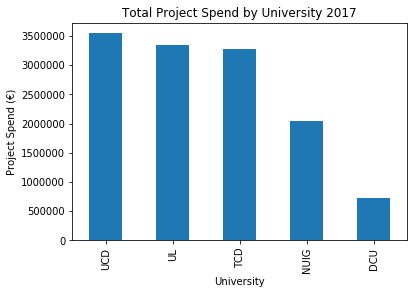

In [97]:
my_plot = sales_totals.sort_values('Spend',ascending=False).plot(kind='bar',legend=None,title="Total Project Spend by University 2017")
my_plot.set_xlabel("University")
my_plot.set_ylabel("Project Spend (€)")

In [98]:
customers = data[['University','Spend','Start']]
customers.head()

,University,Spend,Start
0,NUIG,595810.0,2017-06-04 16:50:20
1,UL,138183.0,2017-08-21 04:30:28
2,UCD,111904.0,2017-07-05 04:29:40
3,UCD,45737.0,2017-06-13 15:02:00
4,UCD,546537.0,2017-01-16 05:10:38


In [120]:
category_group=customers.groupby(['University','Category']).sum()
category_group.head()

Spend
University Category        
DCU        Agric     122112
           Library    41298
NUIG       Agric      76811
           Specific   86616
           Vet        71522

In [121]:
category_group.unstack().head()

Spend                                       
Category       Agric      Lab   Library  Specific       Vet
University                                                 
DCU         122112.0      NaN   41298.0       NaN       NaN
NUIG         76811.0      NaN       NaN   86616.0   71522.0
TCD              NaN  32012.0   37372.0   87079.0  114453.0
UCD         113010.0  96331.0  177134.0       NaN   69259.0
UL           45737.0  73760.0       NaN  110719.0   69177.0

Text(0,0.5,'Project Spend (€)')

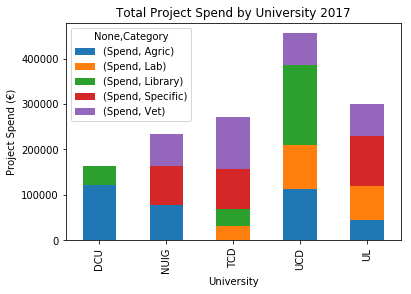

In [122]:
my_plot = category_group.unstack().plot(kind='bar',stacked=True,title="Total Project Spend by University 2017")
my_plot.set_xlabel("University")
my_plot.set_ylabel("Project Spend (€)")


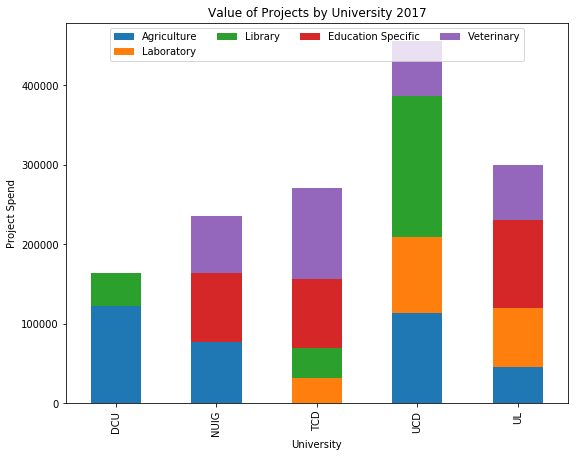

In [171]:
my_plot = category_group.unstack().plot(kind='bar',stacked=True,title="Value of Projects by University 2017",figsize=(9, 7))
my_plot.set_xlabel("University")
my_plot.set_ylabel("Project Spend")
my_plot.legend(["Agriculture","Laboratory","Library","Education Specific", "Veterinary"], loc=9,ncol=4)

In [164]:
employees = data[['Specialist', 'University', 'Spend','Start']]
employees.head()

,Specialist,University,Spend,Start
0,John,NUIG,71522,2017-03-18 10:30:24
1,Tom,UL,45737,2017-11-09 00:35:43
2,John,UCD,53647,2017-02-03 20:08:37
3,Ann,UCD,86353,2017-10-14 06:55:26
4,Ann,UCD,37134,2017-06-16 14:13:20


In [165]:
employees_group=employees.groupby(['Specialist','University']).sum()
employees_group.head()

Spend
Specialist University        
Ann        DCU          88360
           TCD          85535
           UCD         259945
           UL          184479
John       DCU          41298

In [166]:
employees_group.unstack().head()

Spend                                       
University      DCU     NUIG       TCD       UCD        UL
Specialist                                                
Ann         88360.0      NaN   85535.0  259945.0  184479.0
John        41298.0  71522.0   32012.0  195789.0   34396.0
Mark            NaN  52257.0  153369.0       NaN       NaN
Mary        33752.0  34359.0       NaN       NaN       NaN
Tom             NaN  76811.0       NaN       NaN   80518.0

Text(0,0.5,'University')

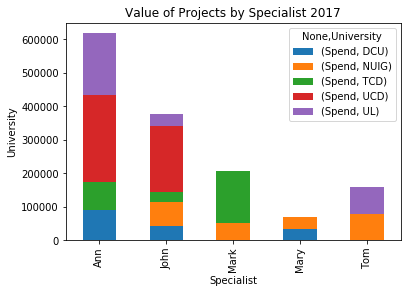

In [169]:
my_plot = employees_group.unstack().plot(kind='bar',stacked=True,title="Value of Projects by Specialist 2017")
my_plot.set_xlabel("Specialist")
my_plot.set_ylabel("University")


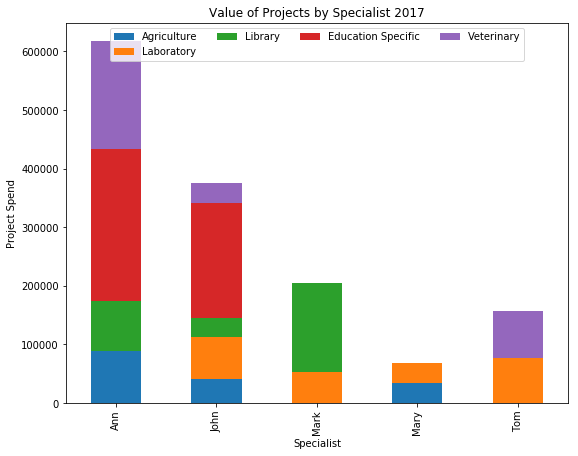

In [170]:
my_plot = employees_group.unstack().plot(kind='bar',stacked=True,title="Value of Projects by Specialist 2017",figsize=(9, 7))
my_plot.set_xlabel("Specialist")
my_plot.set_ylabel("Project Spend")
my_plot.legend(["Agriculture","Laboratory","Library","Education Specific", "Veterinary"], loc=9,ncol=4)

In [ ]:
my_plot = category_group.unstack().plot(kind='bar',stacked=True,title="Total Project Spend by University 2017",figsize=(9, 7))
my_plot.set_xlabel("University")
my_plot.set_ylabel("Project Spend")
my_plot.legend(["Agriculture","Laboratory","Library","Education Specific", "Veterinary"], loc=9,ncol=4)

In [124]:
purchase_patterns = data[['Spend','Start']]
purchase_patterns.head()

,Spend,Start
0,71522,2017-03-18 10:30:24
1,45737,2017-11-09 00:35:43
2,53647,2017-02-03 20:08:37
3,86353,2017-10-14 06:55:26
4,37134,2017-06-16 14:13:20


Text(0,0.5,'Number of Projects')

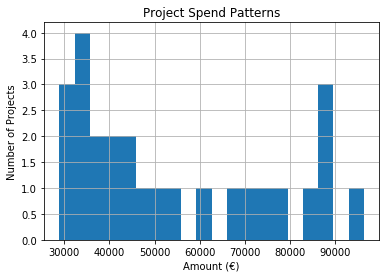

In [125]:
purchase_plot = purchase_patterns['Spend'].hist(bins=20)
purchase_plot.set_title("Project Spend Patterns")
purchase_plot.set_xlabel("Amount (€)")
purchase_plot.set_ylabel("Number of Projects")

In [147]:
purchase_patterns = purchase_patterns.set_index('Start')
purchase_patterns.head()

""
Start
2017-03-18 10:30:24
2017-11-09 00:35:43
2017-02-03 20:08:37
2017-10-14 06:55:26
2017-06-16 14:13:20


In [156]:
purchase_patterns

""
Start
2017-03-18 10:30:24
2017-11-09 00:35:43
2017-02-03 20:08:37
2017-10-14 06:55:26
2017-06-16 14:13:20
2017-10-09 06:57:53
2017-04-10 18:55:46
2017-03-30 17:08:52
2017-04-27 17:45:06


In [ ]:
'University', 'Category', 'Spend', 'Start', 'Duration', 'Specialist']

In [173]:
data.mean()

Spend       63078.269231
Month           7.153846
Duration       15.846154
dtype: float64

In [183]:
data_high = data[data["Spend"]>=60000]

In [184]:
data_high

,University,Category,Spend,Start,Duration,Specialist
0,NUIG,Vet,71522,2017-03-18 10:30:24,23,John
3,UCD,Library,86353,2017-10-14 06:55:26,51,Ann
5,TCD,Vet,85535,2017-10-09 06:57:53,39,Ann
6,UCD,Agric,72883,2017-04-10 18:55:46,56,John
7,DCU,Agric,88360,2017-03-30 17:08:52,41,Ann
8,NUIG,Agric,76811,2017-04-27 17:45:06,38,Tom
15,TCD,Specific,87079,2017-10-18 15:24:05,32,Mark
20,UCD,Vet,69259,2017-03-19 09:31:30,59,John
23,UL,Specific,62237,2017-01-04 10:52:47,51,Ann
25,UCD,Lab,96331,2017-08-04 07:07:39,23,Ann


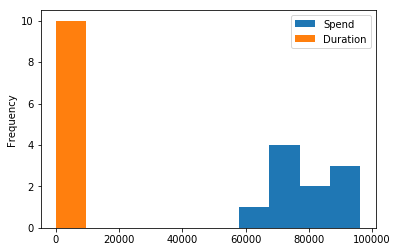

In [195]:
%matplotlib inline
data_high.plot.hist('Category')
plt.show()

In [176]:
data_low = data[data["Spend"]<=60000]

In [177]:
data_low

,University,Category,Spend,Month,Duration,Specialist
0,DCU,Lab,46107,7,24,Tom
1,DCU,Agric,29930,9,25,John
4,DCU,Agric,45165,12,2,Ann
5,UCD,Vet,25100,11,15,Mark
8,DCU,Library,31037,3,22,Mark
10,UL,Vet,50247,12,15,Ann
12,UCD,Library,49813,4,21,Mark
16,NUIG,Vet,47957,5,23,Mary
18,TCD,Lab,54849,6,23,Mary
23,NUIG,Vet,28418,5,29,Mary


In [ ]:
# Standard import for pandas, numpy and matplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the csv file and display some of the basic info
sales=pd.read_csv("sample-salesv2.csv",parse_dates=['date'])
print "Data types in the file:"
print sales.dtypes
print "Summary of the input file:"
print sales.describe()
print "Basic unit price stats:"
print sales['unit price'].describe()

# Filter the columns down to the ones we need to look at for customer sales
customers = sales[['name','ext price','date']]

#Group the customers by name and sum their sales
customer_group = customers.groupby('name')
sales_totals = customer_group.sum()

# Create a basic bar chart for the sales data and show it
bar_plot = sales_totals.sort(columns='ext price',ascending=False).plot(kind='bar',legend=None,title="Total Sales by Customer")
bar_plot.set_xlabel("Customers")
bar_plot.set_ylabel("Sales ($)")
plt.show()

# Do a similar chart but break down by category in stacked bars
# Select the appropriate columns and group by name and category
customers = sales[['name','category','ext price','date']]
category_group = customers.groupby(['name','category']).sum()

# Plot and show the stacked bar chart
stack_bar_plot = category_group.unstack().plot(kind='bar',stacked=True,title="Total Sales by Customer",figsize=(9, 7))
stack_bar_plot.set_xlabel("Customers")
stack_bar_plot.set_ylabel("Sales")
stack_bar_plot.legend(["Total","Belts","Shirts","Shoes"], loc=9,ncol=4)
plt.show()

# Create a simple histogram of purchase volumes
purchase_patterns = sales[['ext price','date']]
purchase_plot = purchase_patterns['ext price'].hist(bins=20)
purchase_plot.set_title("Purchase Patterns")
purchase_plot.set_xlabel("Order Amount($)")
purchase_plot.set_ylabel("Number of orders")
plt.show()

# Create a line chart showing purchases by month
purchase_patterns = purchase_patterns.set_index('date')
month_plot = purchase_patterns.resample('M',how=sum).plot(title="Total Sales by Month",legend=None)
fig = month_plot.get_figure()

#Show the image, then save it
plt.show()
fig.savefig("total-sales.png")

In [131]:
cf = data.loc[:, 'University']

In [132]:
cf

0      UCD
1      TCD
2      TCD
3      TCD
4      TCD
5      DCU
6       UL
7      UCD
8      TCD
9     NUIG
10     UCD
11     TCD
12     TCD
13     DCU
14      UL
15      UL
16     DCU
17    NUIG
18      UL
19    NUIG
20     UCD
21     UCD
22      UL
23      UL
24     UCD
25     UCD
Name: University, dtype: object

In [134]:
summary(data)

NameError: name 'summary' is not defined

In [27]:
import seaborn as sns

C:\Users\Windows\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


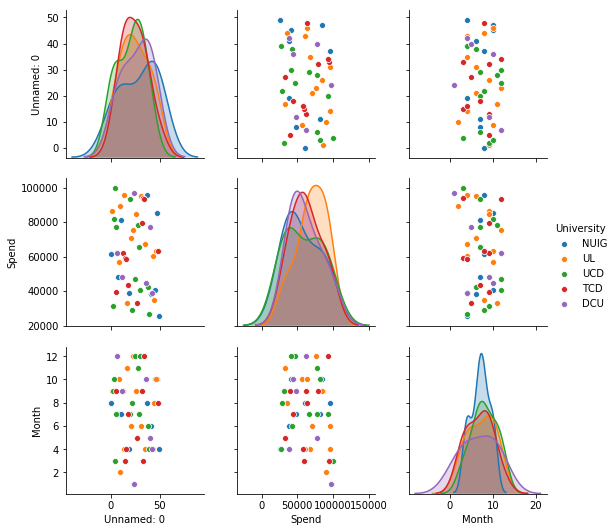

In [29]:
sns.pairplot(data, hue='University')

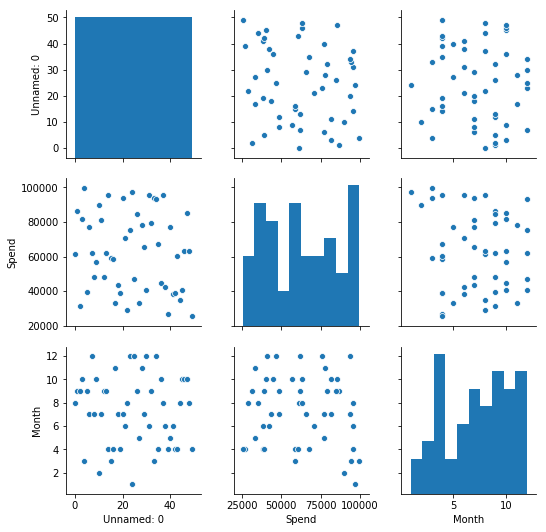

In [30]:
sns.pairplot(data)

References additional:

https://www.daveoncode.com/2013/05/20/generate-random-dates-in-python-using-datetime-and-random-modules/<br>
https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html<br>
https://medium.com/@1522933668924/using-matplotlib-in-jupyter-notebooks-comparing-methods-and-some-tips-python-c38e85b40ba1
https://stackoverflow.com/questions/31029560/plotting-categorical-data-with-pandas-and-matplotlib<br>
https://realpython.com/python-histograms/<br>
https://stackoverflow.com/questions/34347145/pandas-plot-doesnt-show<br>
http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot<br>
https://stackoverflow.com/questions/47487753/when-is-it-appropriate-to-use-df-value-counts-vs-df-groupby-count<br>
https://chrisalbon.com/python/data_wrangling/pandas_saving_dataframe_as_csv/<br>
https://towardsdatascience.com/exploratory-data-analysis-with-pandas-and-jupyter-notebooks-36008090d813<br>
https://medium.com/python-pandemonium/introduction-to-exploratory-data-analysis-in-python-8b6bcb55c190<br>
http://pbpython.com/simple-graphing-pandas.html<br>
https://stackoverflow.com/questions/50559078/generating-random-dates-within-a-given-range-in-pandas<br>
<br>
<br>
<br>
http://pbpython.com/simple-graphing-pandas.html<br>
https://pandas.pydata.org/pandas-docs/stable/visualization.html<br>